In [1]:
import numpy as np
import fitsio
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from SGA.SGA import (unpack_maskbits, OPTMASKBITS, GALEXMASKBITS, UNWISEMASKBITS)

In [2]:
# get these variables from merged catalog
opt_bands = ['g', 'r', 'z']
group = '15761p7004'
galaxy = 'SGA2025_J0157.604+070.050'

In [3]:
ellipsefile = f'{group}/{galaxy}-ellipse-griz.fits'
F = fitsio.FITS(ellipsefile)
F


  file: 15761p7004/SGA2025_J0157.604+070.050-ellipse-griz.fits
  mode: READONLY
  extnum hdutype         hduname[v]
  0      IMAGE_HDU       MODELS
  1      IMAGE_HDU       MASKBITS
  2      BINARY_TBL      ELLIPSE
  3      BINARY_TBL      SBPROFILES

In [4]:
opt_maskbits = F['MASKBITS'].read() # optical maskbits

`unpack_maskbits` is expecting an `[nobj, nrow, ncol]` array, where `nobj` is the number of rows (group members) in this group, so we have to add an empty zeroth dimension.

In [5]:
opt_masks, brightstarmasks, refmasks, gaiamasks, galmasks = \
  unpack_maskbits(opt_maskbits[None, :, :], bands=opt_bands,
                  BITS=OPTMASKBITS, allmasks=True)

In [6]:
# NB: the masks have shape [nobj,nband,width,width]
opt_masks.shape

(1, 3, 1065, 1065)

In [7]:
iobj = 0
opt_masks_obj = opt_masks[iobj, :, :, :]
brightstarmask = brightstarmasks[iobj, :, :]
gaiamask = gaiamasks[iobj, :, :]
galmask = galmasks[iobj, :, :]
refmask = refmasks[iobj, :, :]

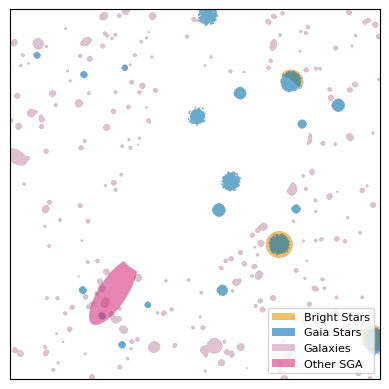

In [8]:
alpha = 0.6
orange = (0.9, 0.6, 0.0, alpha)   # golden-orange
blue   = (0.0, 0.45, 0.7, alpha)  # muted blue
purple = (0.8, 0.6, 0.7, alpha)   # soft violet
magenta = (0.85, 0.2, 0.5, alpha) # vibrant rose

leg = []
fig, ax = plt.subplots()
for msk, col, label in zip([brightstarmask, gaiamask, galmask, refmask],
                           [orange, blue, purple, magenta],
                           ['Bright Stars', 'Gaia Stars', 'Galaxies', 'Other SGA']):
    rgba = np.zeros((*msk.shape, 4))
    rgba[msk] = col
    ax.imshow(rgba, origin='lower')
    leg.append(Patch(facecolor=col, edgecolor='none', alpha=0.6, label=label))

ax.set_xticks([])
ax.set_yticks([])
ax.margins(0)
ax.legend(handles=leg, loc='lower right', fontsize=8)